In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv("full_top_2000_audio_features.csv", header=0, index_col=[0])


def data_dict_generator():
    #Initialize empty dict
    data_dict = {}
    for i in range(1999, 2019):
        #Subset dataframe; for example only take rows where pos1999 is not 0 (So song is in top 2000 of 1999)
        sub_df = df[df[f'pos{i}'] != 0]
        #Calculate means, add as dictionary.

        data_dict[f'pos{i}'] = {'acousticness' : sub_df['acousticness'].mean(),
                                'danceability':sub_df['danceability'].mean(),
                                'duration_ms':sub_df['duration_ms'].mean(),
                                'energy':sub_df['energy'].mean(),
                                'instrumentalness':sub_df['instrumentalness'].mean(),
                                'loudness':sub_df['loudness'].mean(),
                                'speechiness':sub_df['speechiness'].mean(),
                                'valence':sub_df['valence'].mean() ,
                                'year':sub_df["year"].mean(),
                                'tempo':sub_df['tempo'].mean(),
                                'liveness':sub_df['liveness'].mean()}
    #Nested dict
    return data_dict

average_data = data_dict_generator()


def data_plotter(internal_feature):
    year_range = np.arange(1999, 2019, dtype=np.int)
    
    track_feat_list = []
    if internal_feature == "duration_ms":
        for i in range(1999, 2019):
            track_feat_list.append(average_data[f'pos{i}'][f'{internal_feature}']/60000)
    else:
        for i in range(1999, 2019):
            track_feat_list.append(average_data[f'pos{i}'][f'{internal_feature}'])
    print("{}".format(max(track_feat_list)-min(track_feat_list)))
#     plt.plot(year_range, track_feat_list, '-o')
#     plt.title(f'{internal_feature} in top2000 over the years')
#     plt.xscale('linear')
#     plt.xlabel("Year")
#     plt.ylabel(f"{internal_feature}")
#     plt.xscale("linear")
#     plt.xticks(np.arange(1999, 2019, step=2))
#     plt.show()

In [16]:
for track_feat in average_data['pos1999']:
    data_plotter(track_feat)

0.08905024133000006
0.02091619999999972
0.5570259416666672
0.05694344999999945
0.007191301680000033
1.200525500000028
0.006195600000000023
0.09869365000000008
13.579999999999927
3.543919500000513
0.004798750000000601


# plot a colorized grid of these graphs
source: https://python-graph-gallery.com/125-small-multiples-for-line-chart/

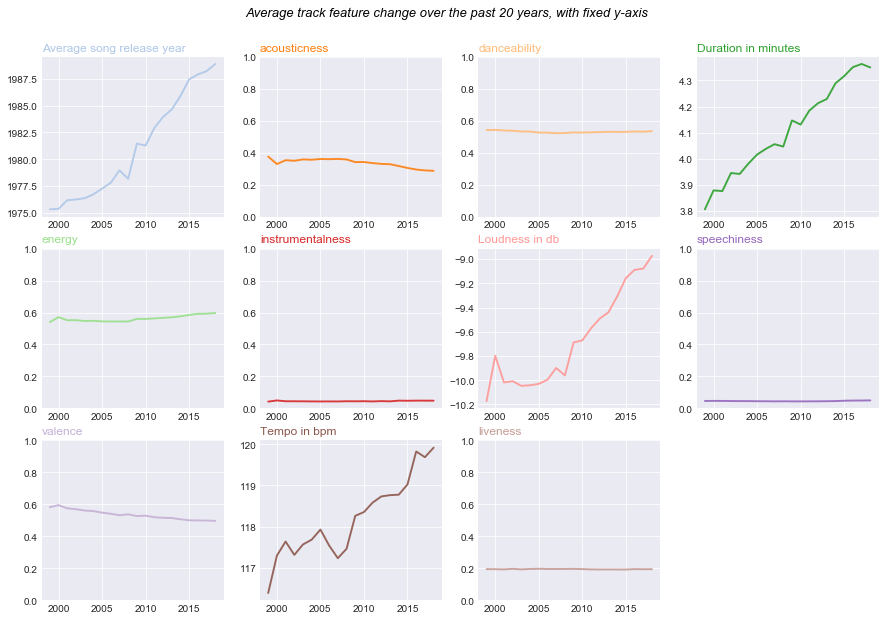

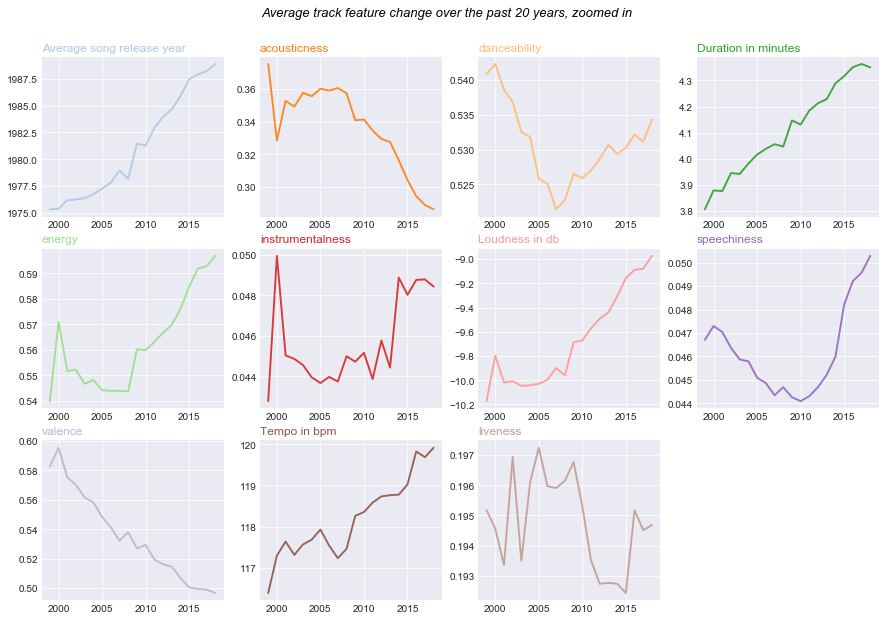

In [24]:
from sklearn import preprocessing

def gridplot(ylim=True, title="", ignorelim=[]):
    # Initialize the figure
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(15,10))

    # create a color palette
    palette = plt.get_cmap('tab20')

    # Create a list with everything BUT the track features
    drop_list = []
    for feat in df.columns[:len(df.columns)-10]:
        if feat!="year":
            drop_list.append(feat)

    # Create a np array of the years
    year_range = np.arange(1999, 2019, dtype=np.int)

    # initialize a standardizer object
    scaler = preprocessing.MinMaxScaler()

    # multiple line plot
    num=0
    for column in df.drop(drop_list, axis=1):
        num+=1

        # Find the right spot on the plot
        plt.subplot(3,4, num)

        # Create the corresponding track feature list
        track_feat_list = []
        for i in range(1999, 2019):
            if column=="duration_ms":
                track_feat_list.append(average_data[f'pos{i}'][f'{column}']/60000)
            else: track_feat_list.append(average_data[f'pos{i}'][f'{column}'])

        # Plot the lineplot
        plt.plot(year_range, track_feat_list, marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)

        # Same fixed limits if ylim is set to true
        if ylim and column not in ignorelim and column != 'tempo':
            plt.ylim(0,1)
            

        # Not ticks everywhere
        if num in range(7) : plt.tick_params(labelbottom='off')
        if num not in [1,4,7] : plt.tick_params(labelleft='off')

        # Add title
        if column == 'duration_ms': plt.title(f'Duration in minutes', loc='left', fontsize=12, fontweight=0, color=palette(num))
        elif column == 'year': plt.title(f"Average song release year", loc='left', fontsize=12, fontweight=0, color=palette(num))
        elif column == 'loudness': plt.title(f"Loudness in db", loc='left', fontsize=12, fontweight=0, color=palette(num))
        elif column == 'tempo': plt.title(f"Tempo in bpm", loc='left', fontsize=12, fontweight=0, color=palette(num))
        else: plt.title(f'{column}', loc='left', fontsize=12, fontweight=0, color=palette(num))

    # general title
    plt.suptitle(title, fontsize=13, fontweight=0, color='black', style='italic', y=0.95)

    # Axis title
    # plt.text(0.5, 0.04, 'Year', ha='center', va='center')
    # plt.text(0.06, 0.5, 'Feature value', ha='center', va='center', rotation='vertical')
    plt.savefig(f'{title}.png', bbox_inches='tight')
    plt.show()
    
title1 ="Average track feature change over the past 20 years, with fixed y-axis"
title2 = "Average track feature change over the past 20 years, zoomed in"
ignorelim = ['year', 'duration_ms', 'loudness']

gridplot(title=title1, ignorelim=ignorelim)
gridplot(ylim=False, title=title2, ignorelim=ignorelim)


In [25]:
# Transform dict to
average_data = pd.DataFrame(average_data)

# average_data['list year'] = average_data.index
average_data = average_data.transpose()
average_data.to_csv('stata_data.csv')

In [26]:
average_data

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,speechiness,valence,year,tempo,liveness
pos1999,0.375287,0.540846,228369.1395,0.539919,0.042769,-10.173540,0.046713,0.582559,1975.3130,116.377914,0.195174
pos2000,0.328383,0.542313,232721.6170,0.570997,0.049960,-9.798571,0.047297,0.595286,1975.3570,117.290330,0.194567
pos2001,0.352637,0.538615,232559.5545,0.551763,0.045032,-10.018763,0.047040,0.575207,1976.1645,117.633530,0.193363
pos2002,0.349118,0.536842,236715.1050,0.552228,0.044860,-10.008360,0.046368,0.569917,1976.2350,117.307730,0.196931
pos2003,0.357614,0.532526,236501.1405,0.546713,0.044556,-10.046883,0.045873,0.561437,1976.3535,117.563041,0.193505
pos2004,0.355519,0.531796,238882.6525,0.548200,0.043946,-10.042189,0.045790,0.558132,1976.7125,117.679583,0.196087
pos2005,0.360171,0.525777,240965.6270,0.544223,0.043666,-10.030490,0.045092,0.548279,1977.2435,117.925524,0.197236
pos2006,0.358985,0.525077,242268.1180,0.543983,0.043970,-9.996232,0.044868,0.541245,1977.7980,117.536575,0.195964
pos2007,0.360548,0.521397,243346.4985,0.543965,0.043738,-9.899056,0.044345,0.532117,1978.9495,117.227402,0.195904
pos2008,0.357354,0.522737,242797.6805,0.543742,0.044994,-9.961009,0.044689,0.537910,1978.1640,117.456659,0.196143


# Function for making a radar plot
Source: https://matplotlib.org/3.1.0/gallery/specialty_plots/radar_chart.html 

This code hasn't been changed in order to work with the data

Duration_ms and loudness need to be normalized in order to correctly fit in the radar plot

In [ ]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

# Setup and fill the radar plot

In [ ]:
N = len(average_data['pos1999'])
theta = radar_factory(N, frame='polygon')

data = example_data()
spoke_labels = data.pop(0)

fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2,
                         subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']
# Plot the four cases from the example data on separate axes
for ax, (title, case_data) in zip(axes.flat, data):
    ax.set_rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color=color)
        ax.fill(theta, d, facecolor=color, alpha=0.25)
    ax.set_varlabels(spoke_labels)

# add legend relative to top-left plot
ax = axes[0, 0]
labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1, fontsize='small')

fig.text(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
         horizontalalignment='center', color='black', weight='bold',
         size='large')

plt.show()